In [111]:
# Statistical analysis of the snails called abalones.
# Information about the dataset:
# Attributes (columns):
# 1. sex - categorical:
#    M - male
#    F - female
#    I - infant
# 2. length [mm] - continuous
# 3. diameter [mm] - continuous
# 4. height [mm] - continuous
# 5. whole weight [g] - continuous
# 6. shucked weight [g] (weight of meat) - continuous
# 7. viscera weight [g] (gut weight after bleeding) - continuous
# 8. shell weight [g] (after being dried) - continuous
# 9. rings - integer

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Loading the dataset, and preparing it for analysis

In [114]:
data = pd.read_csv("data/data.csv", sep=',')
colnames = ['Sex', 'Length [mm]', 'Diameter [mm]', 'Height [mm]', 'Whole weight [g]', 'Shucked weight [g]',
            'Viscera weight [g]', 'Shell weight [g]', 'Rings']
df = data.select_dtypes(include=['number'])
data.columns = colnames
df.columns = colnames[1:]

In [115]:
# 1. Table of the distribution of the qualitative variable in the dataset

In [116]:
def qualitative_characteristics():
    v1 = data['Sex'].value_counts().values
    return [v1, v1 / v1.sum() * 100]

table1 = pd.DataFrame(qualitative_characteristics(), columns=["Male", "Infant", "Female"], index=["Count", "%"])
display(table1.T)

,Count,%
Male,1527.0,36.566092
Infant,1342.0,32.136015
Female,1307.0,31.297893


In [117]:
# 2. Table with summary statistics for the quantitative variables in the dataset

In [118]:
def quantitative_characteristics():
    result = []
    for l, column in enumerate(df.columns):
        result.append(df.iloc[:, l].describe().drop('count').T)
    return result

table2 = pd.DataFrame(quantitative_characteristics(), columns=["mean", "std", "min", "25%", "50%", "75%", "max"])
display(table2)

,mean,std,min,25%,50%,75%,max
Length [mm],0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter [mm],0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height [mm],0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight [g],0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight [g],0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight [g],0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight [g],0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


In [119]:
# 3. Counts of occurrences of each category for the qualitative variable in the dataset.

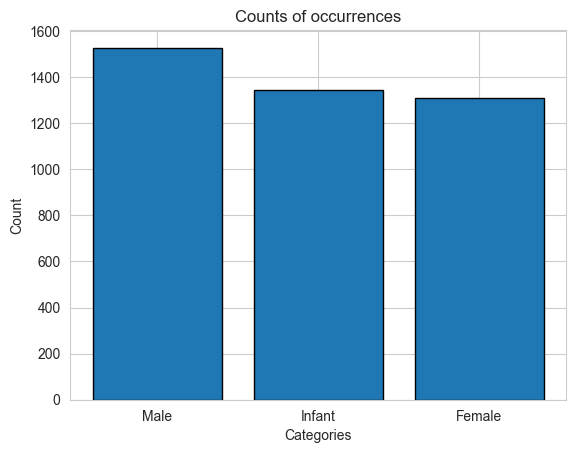

In [120]:
qualitative = qualitative_characteristics()
categories = ['Male', 'Infant', 'Female']
plt.bar(categories, qualitative[0], edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Categories')
plt.title('Counts of occurrences')
plt.show()

In [121]:
# 4. histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure
    # spanning 4 rows and 2 columns.

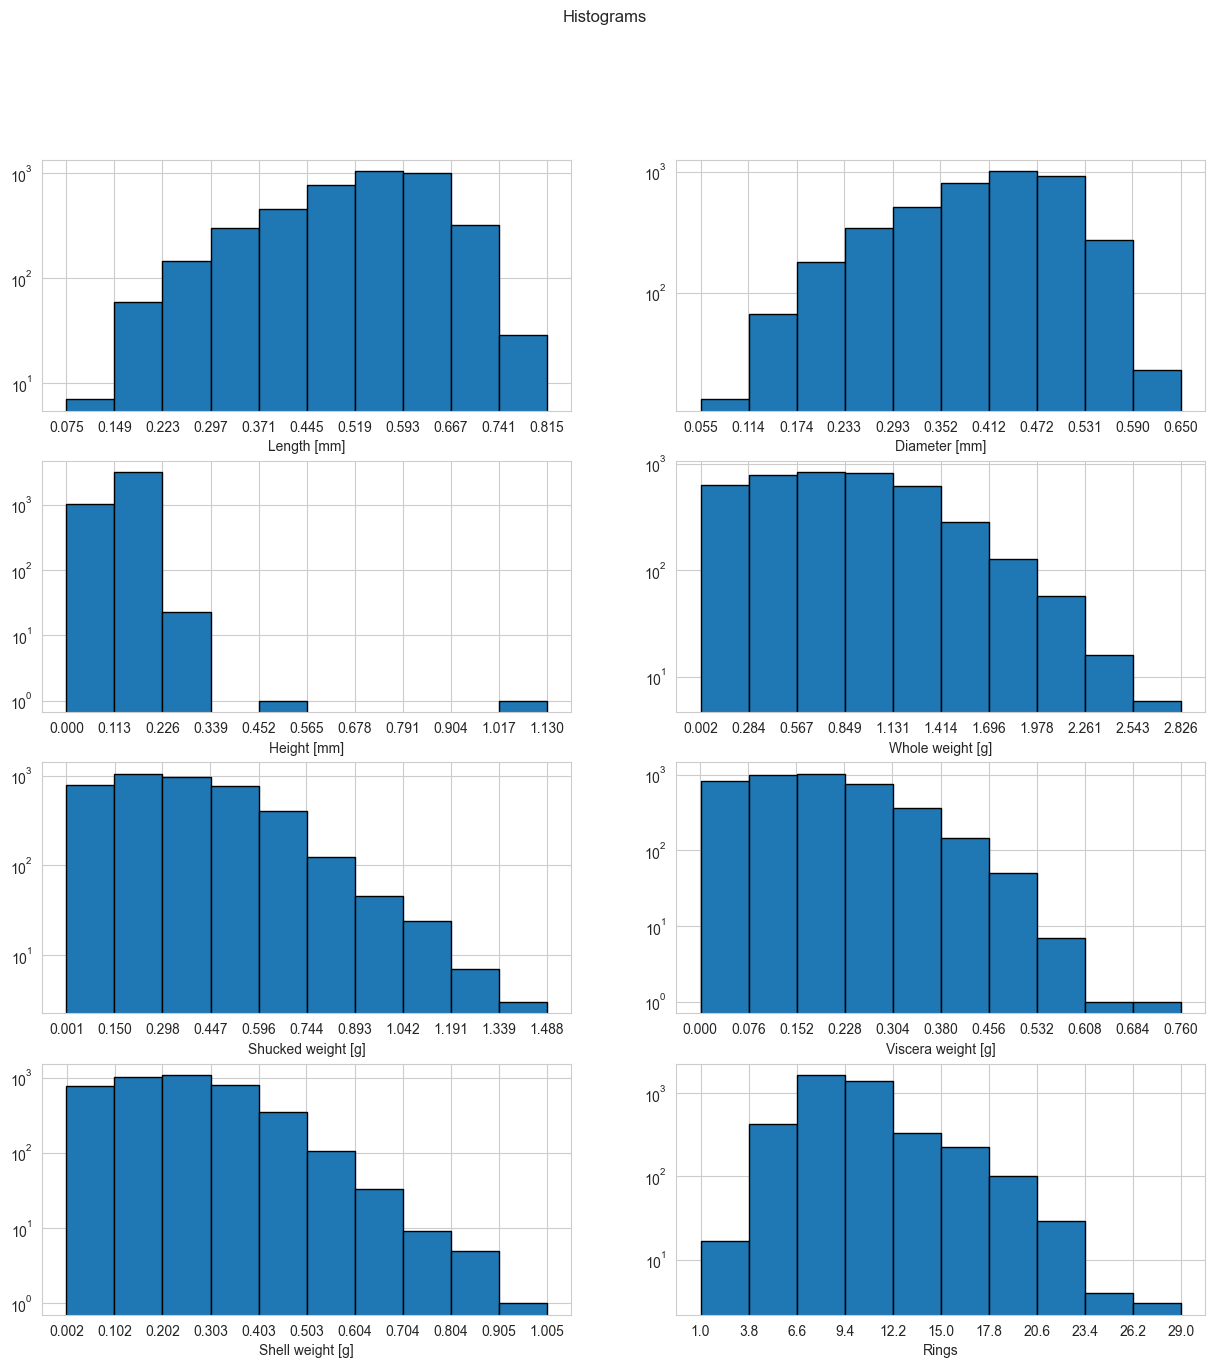

In [122]:
def adjust_for_histrogram(column, bins):
    mininum = column.min()
    maximum = column.max()
    bin_size = (maximum - mininum) / bins
    return [mininum, maximum, bin_size]

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms')
j = 0
for i in range(len(df.columns)):
    axs[j, i % 2].hist(df.iloc[:, i], bins=10, edgecolor='black', log=True)
    axs[j, i % 2].set_xlabel(colnames[i + 1])
    arr = adjust_for_histrogram(df.iloc[:, i], 10)
    axs[j, i % 2].set_xticks([round(arr[0] + arr[2] * i, 3) for i in range(11)])
    j += i % 2
plt.show()

In [123]:
# 5. Scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed 
    # in a single figure spanning 14 rows and 2 columns.

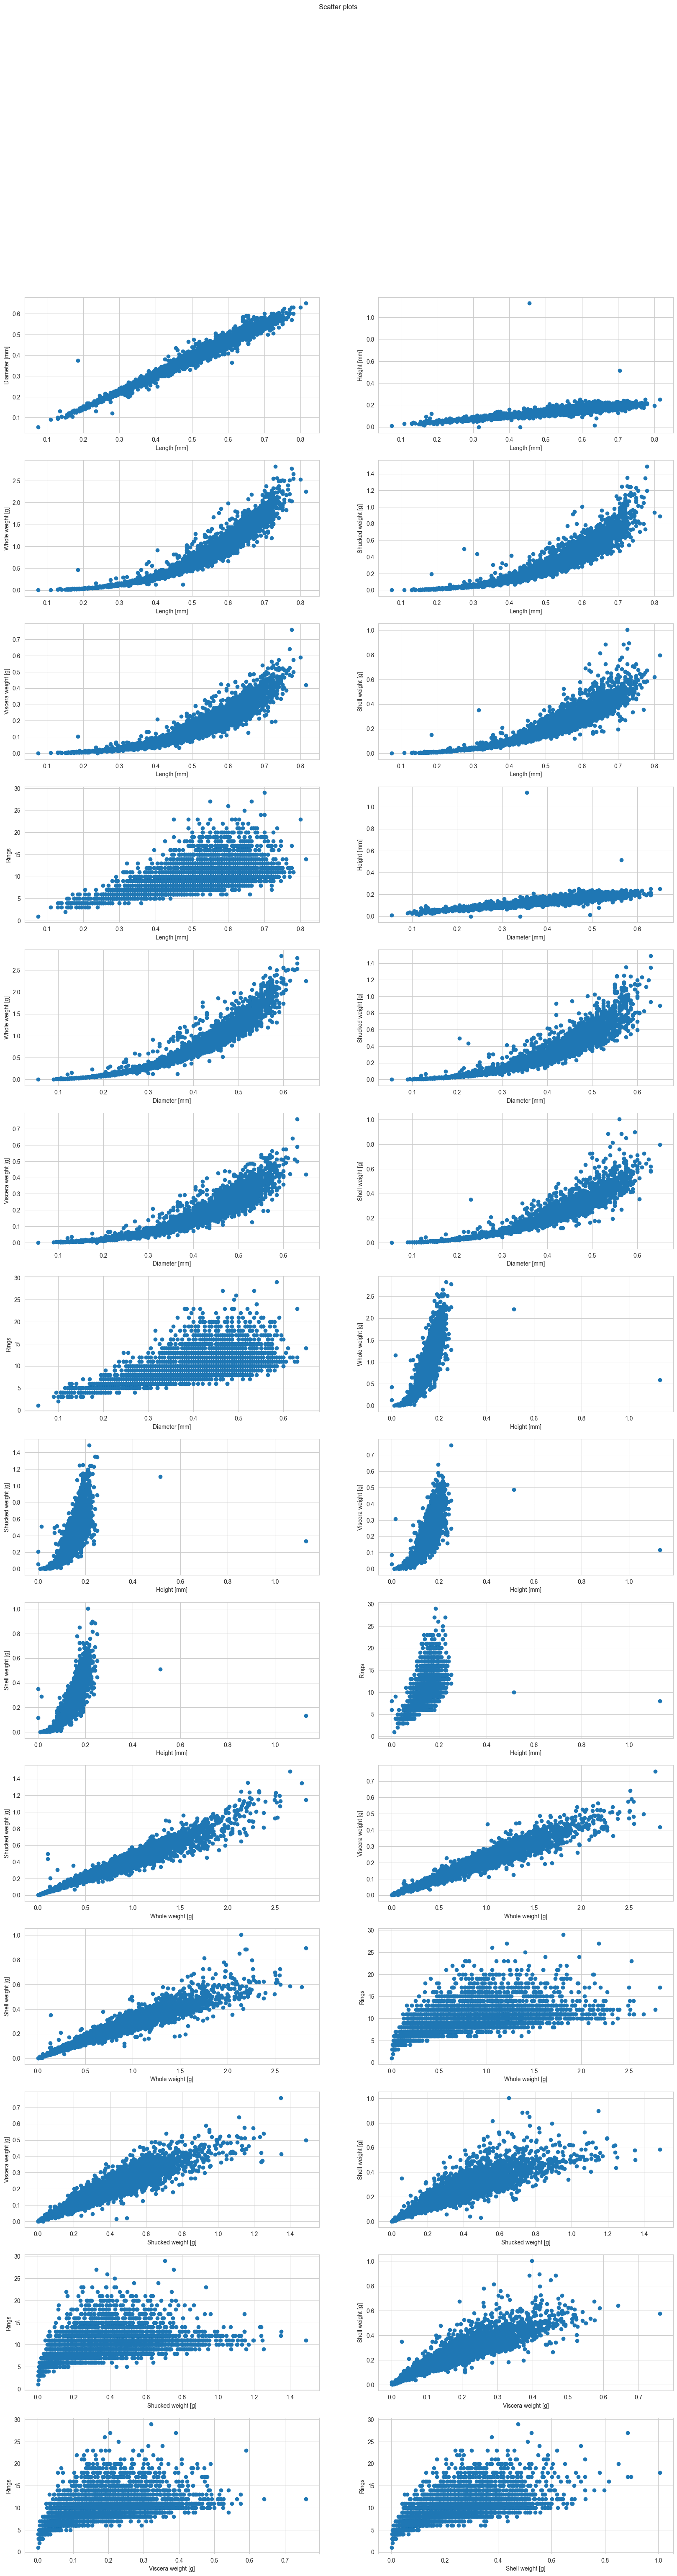

In [124]:
fig, axs = plt.subplots(14, 2, figsize=(20, 70))
fig.suptitle('Scatter plots')
k, x = 0, 0
for i in range(8):
    for j in range(i + 1, 8):
        axs[x, k % 2].scatter(df.iloc[:, i], df.iloc[:, j])
        axs[x, k % 2].set_xlabel(colnames[i + 1])
        axs[x, k % 2].set_ylabel(colnames[j + 1])
        k += 1
        if k % 2 == 0:
            x += 1
plt.show()

In [125]:
# 6. Table representing a linear correlation matrix of all quantitative variables in the dataset.

In [126]:
df.columns = colnames[1:]
display(df.corr())

,Length [mm],Diameter [mm],Height [mm],Whole weight [g],Shucked weight [g],Viscera weight [g],Shell weight [g],Rings
Length [mm],1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter [mm],0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height [mm],0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight [g],0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight [g],0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight [g],0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight [g],0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [127]:
# 7. heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

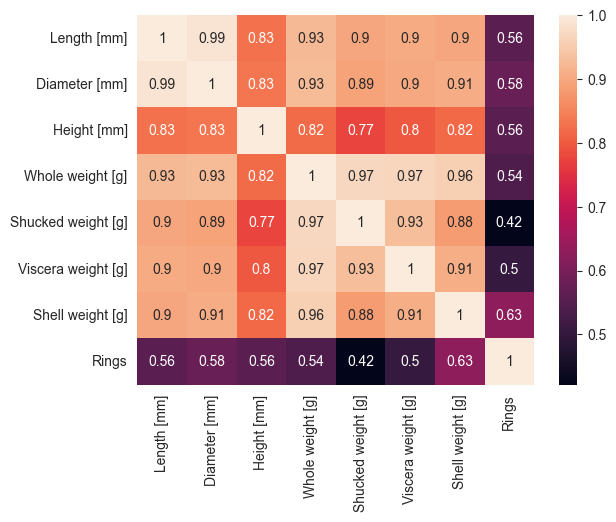

In [128]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [129]:
# 8. Linear regression plot with the two quantitative variables that are most strongly linearly correlated.

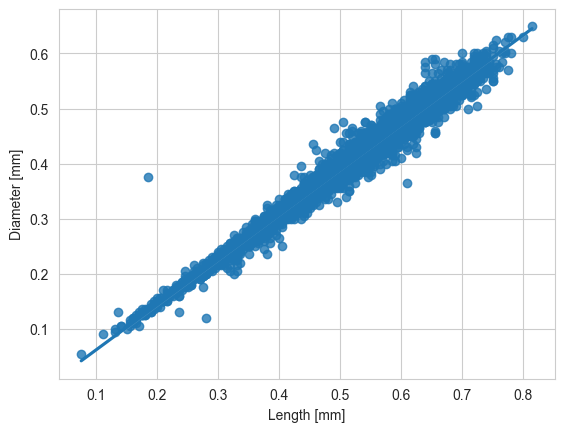

In [130]:
sns.regplot(x=df['Length [mm]'], y=df['Diameter [mm]'])
plt.show()

In [131]:
# Table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable

In [132]:
tmp = ['F', 'I', 'M']
final = []
for col in data.columns[1:]:
    for el in tmp:
        stats = data[data['Sex'] == el][col].describe().drop('count').values
        stats = [round(l, 3) for l in stats]
        stats.insert(0, el)
        stats.insert(0, col)
        final.append(stats)

table3 = pd.DataFrame(final, columns=["Feature", "Sex", "mean", "std", "min", "25%", "50%", "75%", "max"])
display(table3)

,Feature,Sex,mean,std,min,25%,50%,75%,max
0,Length [mm],F,0.579,0.086,0.275,0.525,0.590,0.640,0.815
1,Length [mm],I,0.428,0.109,0.075,0.360,0.435,0.510,0.725
2,Length [mm],M,0.561,0.103,0.155,0.505,0.580,0.630,0.780
3,Diameter [mm],F,0.455,0.071,0.195,0.410,0.465,0.505,0.650
4,Diameter [mm],I,0.326,0.088,0.055,0.270,0.335,0.390,0.550
5,Diameter [mm],M,0.439,0.084,0.110,0.395,0.455,0.500,0.630
6,Height [mm],F,0.158,0.040,0.015,0.140,0.160,0.175,1.130
7,Height [mm],I,0.108,0.032,0.000,0.085,0.110,0.130,0.220
8,Height [mm],M,0.151,0.035,0.025,0.130,0.155,0.175,0.515
9,Whole weight [g],F,1.047,0.430,0.080,0.730,1.038,1.320,2.657
